#Problem Statement
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

##1. Reading and analysis of the dataset

In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#reading the day.csv
#column cnt is our target column
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#we can clearly see that instant column is just an index so we can drop it
day.drop(['instant'], axis = 1, inplace = True)

#we can also drop dteday column as it is just a serial date column
day.drop(['dteday'], axis = 1, inplace = True)

#we can also drop casual column as it is just a count column whose data  is already present in cnt column
day.drop(['casual'], axis = 1, inplace = True)

#we can also drop registered column as it is just a count column whose data  is already present in cnt column
day.drop(['registered'], axis = 1, inplace = True)

In [ ]:
#we have 730 rows and 16 columns in the dataset.
day.shape

(730, 12)

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#####We can see that a few columns have numeric values but they are categorical columns e.g weathersit column has values 1, 2, 3, 4 so we need to convert them to string to make them categorical columns

In [ ]:
#converting season from numeric to categorical column
day[['season']] = day[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

#converting yr from numeric to categorical column
day[['yr']] = day[['yr']].apply(lambda x : x.map({0:'2018', 1:'2019'}))

#converting mnth from numeric to categorical column
day[['mnth']] = day[['mnth']].apply(lambda x : x.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}))

#converting holiday from numeric to categorical column
day[['holiday']] = day[['holiday']].apply(lambda x : x.map({0:'no', 1:'yes'}))

#converting weekday from numeric to categorical column
day[['weekday']] = day[['weekday']].apply(lambda x : x.map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}))

#converting workingday from numeric to categorical column
day[['workingday']] = day[['workingday']].apply(lambda x : x.map({1:'workingday', 0:'weekend_holiday'}))

#converting weathersit from numeric to categorical column
day[['weathersit']] = day[['weathersit']].apply(lambda x : x.map({1:'clear', 2:'mist_cloudy', 3:'light_snow', 4:'heavy_rain'}))

In [ ]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,no,Monday,workingday,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,no,Tuesday,workingday,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,no,Wednesday,workingday,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,no,Thursday,workingday,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,no,Friday,workingday,clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
day.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


##2. Visualizing the dataset

In [ ]:
#importing visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns

###Visualize numeric columns

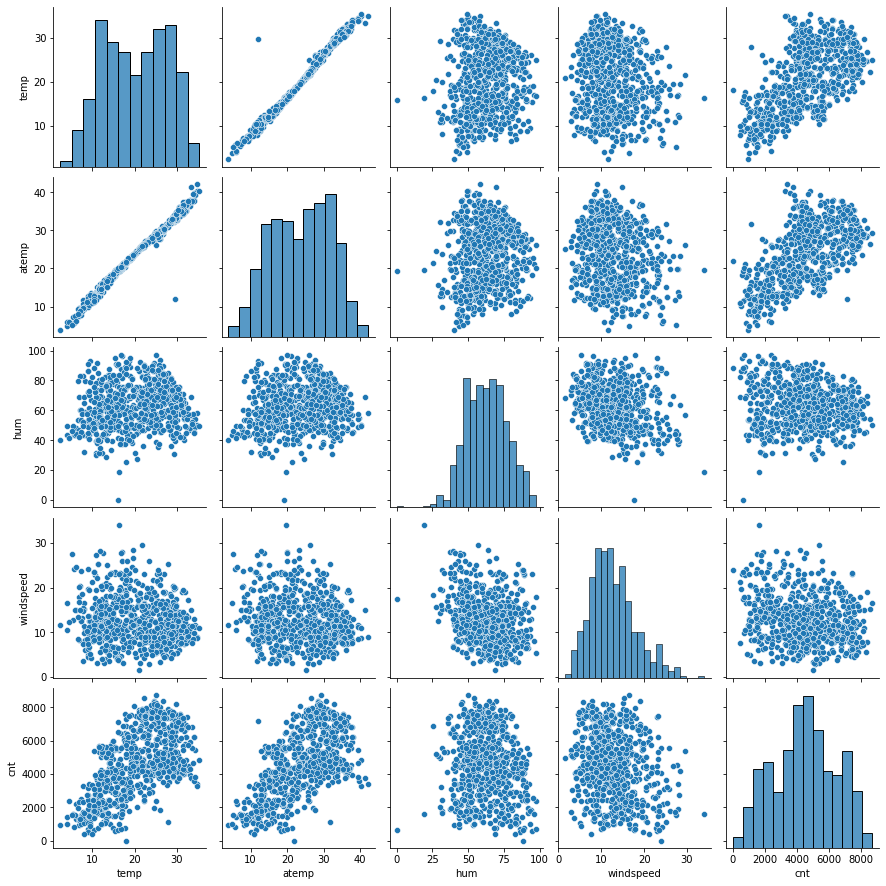

In [ ]:
sns.pairplot(day)
plt.show()

#####Looking at below paiplot we can clearly see relation between columns **temp** and **atemp** with **cnt**
#####columns **hum** and **windspeed** doesn't seem to have much relation with **cnt**

###Visualize categorical columns

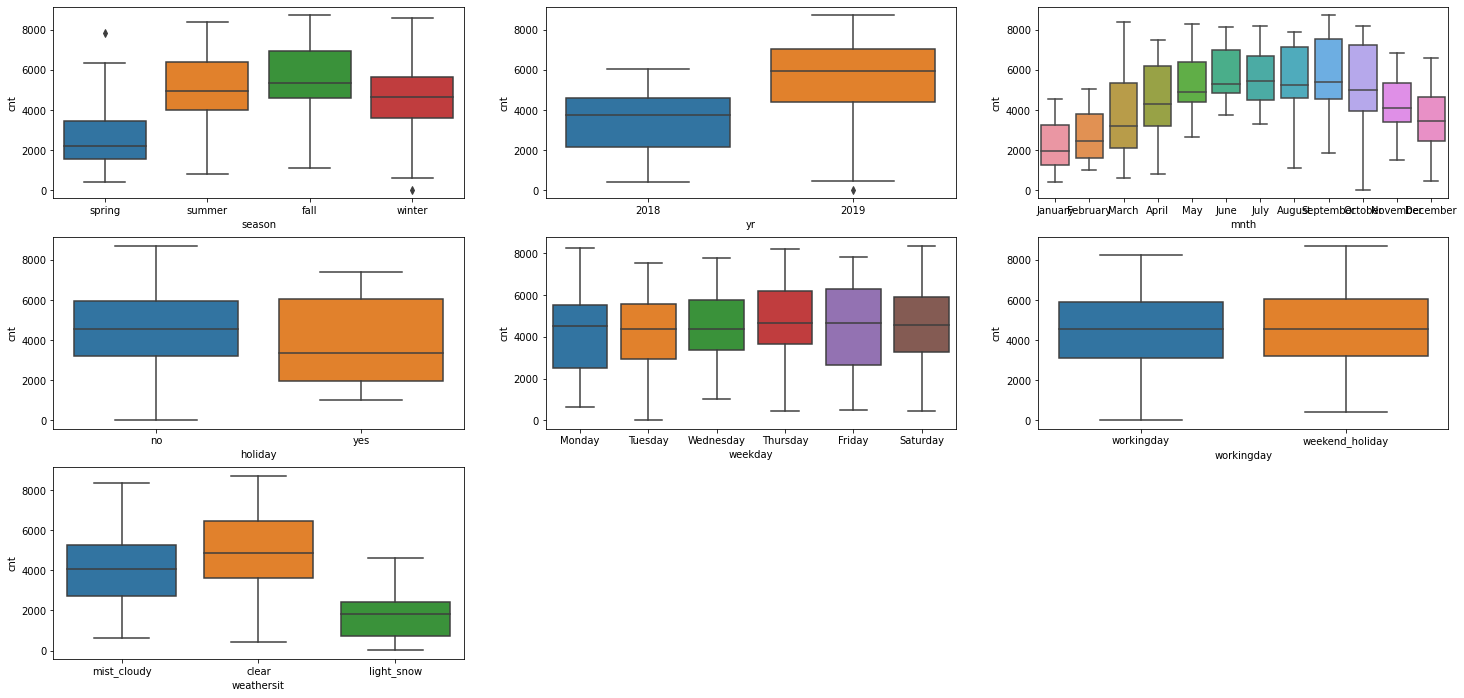

In [ ]:
plt.figure(figsize=(25, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

#####Looking at above boxplot, we can see that demand is higher in
*  Fall followed by Summer
*  2019 compared to 2018
*  months of Summer and Fall
*  no holiday season
*  clear weather

#####weekday and workingday doesn't seem to impact cnt


##3: Data Preparation

In [ ]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,no,Monday,workingday,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,no,Tuesday,workingday,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,no,Wednesday,workingday,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,no,Thursday,workingday,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,no,Friday,workingday,clear,9.305237,11.46350,43.6957,12.522300,1600


#####we need numeric columns to run our regression

In [ ]:
#converting holiday from categorical to numeric column
day[['holiday']] = day[['holiday']].apply(lambda x : x.map({'no':0, 'yes':1}))

#converting yr from categorical to numeric column
day[['yr']] = day[['yr']].apply(lambda x : x.map({'2018':0, '2019':1}))

#converting workingday from categorical to numeric column
day[['workingday']] = day[['workingday']].apply(lambda x : x.map({'workingday':1, 'weekend_holiday':0}))



#####Dummy variable

Lets create dummy variables for **season** column

In [ ]:
season = pd.get_dummies(day['season'])
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
# Let's drop the first column from season df using 'drop_first = True'
season = pd.get_dummies(day['season'], drop_first = True)

# Add the results to the original day dataframe
day = pd.concat([day, season], axis = 1)

# Drop 'season' as we have created the dummies for it
day.drop(['season'], axis = 1, inplace = True)

Lets create dummy variables for **mnth** column

In [ ]:
mnth = pd.get_dummies(day['mnth'])
mnth.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Let's drop the first column from mnth df using 'drop_first = True'
mnth = pd.get_dummies(day['mnth'], drop_first = True)

# Add the results to the original day dataframe
day = pd.concat([day, mnth], axis = 1)

# Drop 'mnth' as we have created the dummies for it
day.drop(['mnth'], axis = 1, inplace = True)

Lets create dummy variables for **weekday** column

In [ ]:
weekday = pd.get_dummies(day['weekday'])
weekday.head()

,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,1,0,0,0,0,0


In [ ]:
# Let's drop the first column from weekday df using 'drop_first = True'
weekday = pd.get_dummies(day['weekday'], drop_first = True)

# Add the results to the original day dataframe
day = pd.concat([day, weekday], axis = 1)

# Drop 'weekday' as we have created the dummies for it
day.drop(['weekday'], axis = 1, inplace = True)

Lets create dummy variables for **weathersit** column

In [ ]:
weathersit = pd.get_dummies(day['weathersit'])
weathersit.head()

,clear,light_snow,mist_cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
# Let's drop the first column from weathersit df using 'drop_first = True'
weathersit = pd.get_dummies(day['weathersit'], drop_first = True)

# Add the results to the original day dataframe
day = pd.concat([day, weathersit], axis = 1)

# Drop 'weathersit' as we have created the dummies for it
day.drop(['weathersit'], axis = 1, inplace = True)

In [ ]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,light_snow,mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##4: Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.shape

(510, 29)

In [ ]:
df_test.shape

(219, 29)

Rescaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,light_snow,mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

##5. Building model

Recursive feature elimination

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

 # running RFE for 10 columns
rfe = RFE(lm, 10) 
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('August', False, 12),
 ('December', False, 6),
 ('February', False, 7),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 18),
 ('March', False, 19),
 ('May', False, 11),
 ('November', False, 5),
 ('October', False, 16),
 ('September', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 15),
 ('Thursday', False, 17),
 ('Tuesday', False, 8),
 ('Wednesday', False, 13),
 ('light_snow', True, 1),
 ('mist_cloudy', False, 2)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'July',
       'September', 'light_snow'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'summer', 'August', 'December', 'February',
       'January', 'June', 'March', 'May', 'November', 'October', 'Monday',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'mist_cloudy'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [ ]:
#using only RFE selected columns
X_train_rfe = X_train[col]

In [ ]:
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.53e-184
Time:                        02:42:20   Log-Likelihood:                -4136.1
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     499   BIC:                             8341.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3298.4180    270.035     12.215      0.0

From the summary above we can see that P>|t| for all feature columns are well below threshold of 0.05

### Lets also calculate VIF

In [ ]:
X_train_rfe_new = X_train_rfe.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,spring,2.40
0,yr,2.06
6,winter,1.98
7,July,1.40
8,September,1.20
9,light_snow,1.11
1,holiday,1.04


- From calculated VIF we can see that column **hum** has VIF>5. 
- We can also recollect from our paiplot where we found **hum** to not have much relation with **cnt**. 
- We can drop **hum** and recalculate VIF analysis.
- We will only drop one column at a time

In [ ]:
X_train_rfe_new = X_train_rfe_new.drop(['hum'], axis=1)

Recalculate VIF after dropping **hum** column

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,spring,1.61
5,winter,1.37
6,July,1.34
7,September,1.20
8,light_snow,1.06
1,holiday,1.04


Now we can clearly see that all features have VIF below 5

In [ ]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.33e-171
Time:                        02:42:20   Log-Likelihood:                -4170.9
No. Observations:                 510   AIC:                             8362.
Df Residuals:                     500   BIC:                             8404.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1796.4901    219.204      8.196      0.0

##6. Residual Analysis of the train data

Text(0.5, 0, 'Errors')

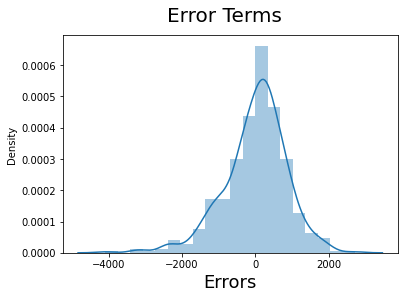

In [ ]:
y_train_price = lm.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Residuals chart is a Normal distribution centered at 0, so we can be confident on our analysis

##7. Making Prediction

Applying the scaling on the test sets

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

##8. Model Evaluation

Text(0, 0.5, 'y_pred')

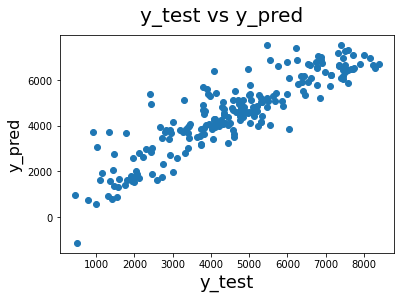

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16) 

Calculating r2 on test and pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045293

## 9. Final Equation

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.33e-171
Time:                        02:42:21   Log-Likelihood:                -4170.9
No. Observations:                 510   AIC:                             8362.
Df Residuals:                     500   BIC:                             8404.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1796.4901    219.204      8.196      0.0

We can see that the equation of our best fitted line is:

$ cnt = 1796.4901 + 2042.5550×yr - 748.8231×holiday + 4135.3293×temp - 1151.5082×windspeed - 897.0029×spring + 437.8478×winter - 535.8254×July + 433.2433×September - 2227.0018×light_snow $